In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import io
file_path = '/content/drive/My Drive/NCF: Philanthropic giving to Black communities in MA/Data and Documentation/Nonprofit Base Bundle and Grants Plus Bundle Data/BU_Spark_20240117.xlsx'
file_path2 = '/content/drive/My Drive/NCF: Philanthropic giving to Black communities in MA/Data and Documentation/Nonprofit Demographic Data/Demographics flat file_202401.xlsx'

# Read the Excel file into a DataFrame
df_base_bundle = pd.read_excel(file_path, sheet_name='Base_bundle')
df_grants = pd.read_excel(file_path, sheet_name='Grants')
df_organizations = pd.read_excel(file_path2, sheet_name='Organizations')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
african_code = 'PE030000'
latin_american_code = 'PE050000'

filtered_df = df_base_bundle[df_base_bundle['pcs_population'].str.contains(african_code) | df_base_bundle['pcs_population'].str.contains(latin_american_code)]
filtered_grants_df = df_grants[df_grants['recip_population_code'].str.contains(african_code) | df_grants['recip_population_code'].str.contains(latin_american_code)]

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

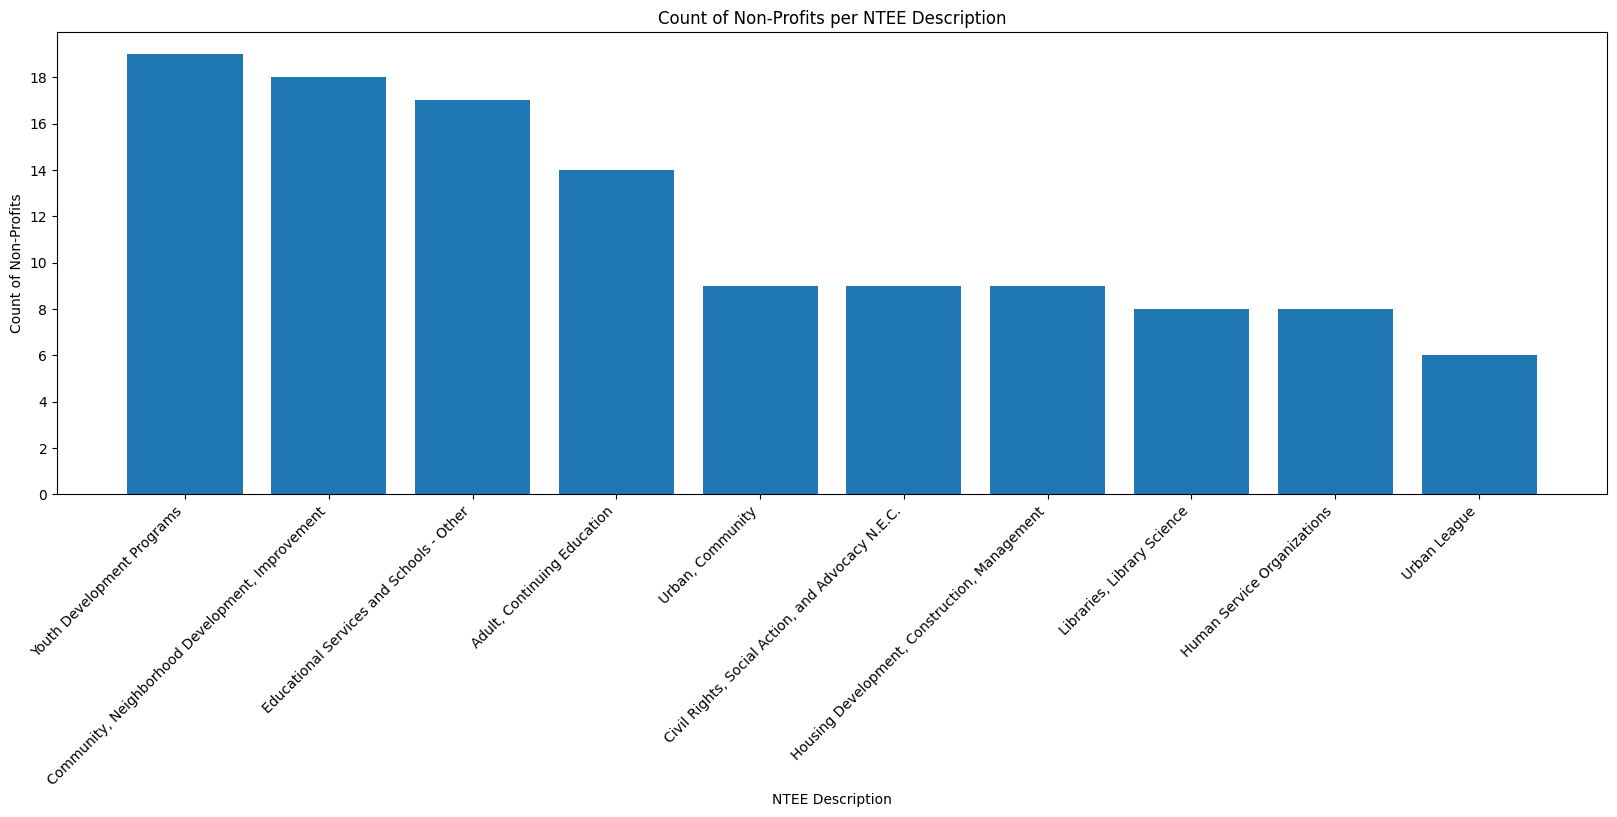

In [7]:
# Bar Chart displaying the missions of overall nonprofits who serve the Black and LatinX community

unique_ntee_df = filtered_df['ntee_description'].unique()
grouped_ntee_df = filtered_df.groupby('ntee_description')['organization_name'].apply(list).reset_index()
grouped_ntee_df['organization_count'] = grouped_ntee_df['organization_name'].apply(len)
grouped_ntee_df = grouped_ntee_df.sort_values(by="organization_count", ascending=False).head(10)

plt.figure(figsize=(20, 6))
plt.bar(grouped_ntee_df['ntee_description'], grouped_ntee_df['organization_count'])
plt.xlabel('NTEE Description')
plt.ylabel('Count of Non-Profits')
plt.title('Count of Non-Profits per NTEE Description')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, int(grouped_ntee_df['organization_count'].max()) + 1, 2))
plt.show()


In [ ]:
# How much funding is going toward nonprofits led by Black or LatinX individuals (president, executive director, board chair, etc.) in Massachusetts?

African = 'Black/African American'
Hispanic = 'Hispanic/Latino/Latina/Latinx'

df_organizations_african_latinx = df_organizations[df_organizations['race_leader'].str.contains(African) | df_organizations['race_leader'].str.contains(Hispanic)]
df1 = df_organizations[['race_leader', 'org_name']]
df2 = df_base_bundle[['organization_name', 'total_revenue']]
merged_df = pd.merge(df1, df2, left_on='org_name', right_on='organization_name', how='inner')
merged_df = merged_df.drop('organization_name', axis=1)

var = merged_df['total_revenue'].sum()
print("$",var, "of funding is going towards nonprofits led by Black or LatinX individuals in MA")


# Percentage of orgs that have race_leader data
no_leader_data_percent = round(df_organizations['race_leader'].isnull().sum() / len(df_organizations) * 100,2)
print(no_leader_data_percent, "% of orgs have no race_leader data")

$ 79670652735.0 of funding is going towards nonprofits led by Black or LatinX individuals in MA
10.26 % of orgs have no race_leader data


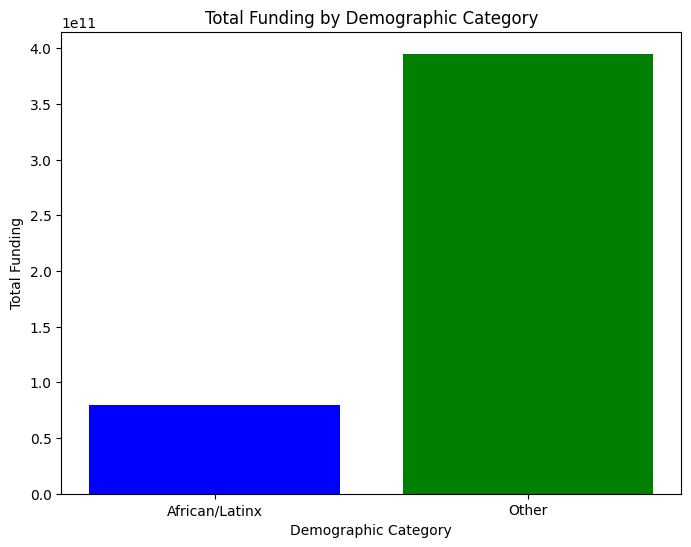

16.78% % of total funding goes to nonprofits led by Black or LatinX individuals


In [ ]:
# total funding going toward nonprofits led by Black or LatinX individuals vs other ethnicities

total_funding_african_latinx = merged_df['total_revenue'].sum()
total_funding_other = df_base_bundle['total_revenue'].sum() - total_funding_african_latinx

data = {
    'Demographic Category': ['African/Latinx', 'Other'],
    'Total Funding': [total_funding_african_latinx, total_funding_other]
}

df_plot = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
plt.bar(df_plot['Demographic Category'], df_plot['Total Funding'], color=['blue', 'green'])
plt.title('Total Funding by Demographic Category')
plt.xlabel('Demographic Category')
plt.ylabel('Total Funding')
plt.show()

fraction = total_funding_african_latinx/(total_funding_other+total_funding_african_latinx)
percentage_str = "{:.2f}%".format(fraction * 100)
print(percentage_str, "% of total funding goes to nonprofits led by Black or LatinX individuals")


# Percentage of orgs that have race_leader data

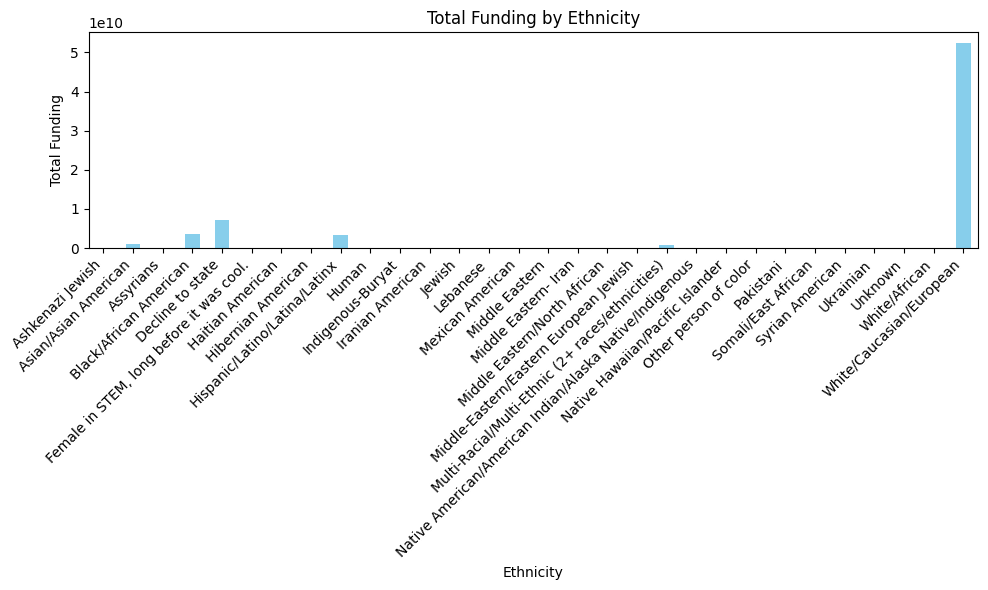

In [ ]:
# graph total funding going toward nonprofits based on ethnicities
df1 = df_organizations[['race_leader', 'org_name']]
df2 = df_base_bundle[['organization_name', 'total_revenue']]
merged_df = pd.merge(df1, df2, left_on='org_name', right_on='organization_name', how='inner')
merged_df = merged_df.drop('organization_name', axis=1)

total_funding_by_race_leader = merged_df.groupby('race_leader')['total_revenue'].sum()

plt.figure(figsize=(10, 6))
total_funding_by_race_leader.plot(kind='bar', color='skyblue')
plt.title('Total Funding by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Total Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

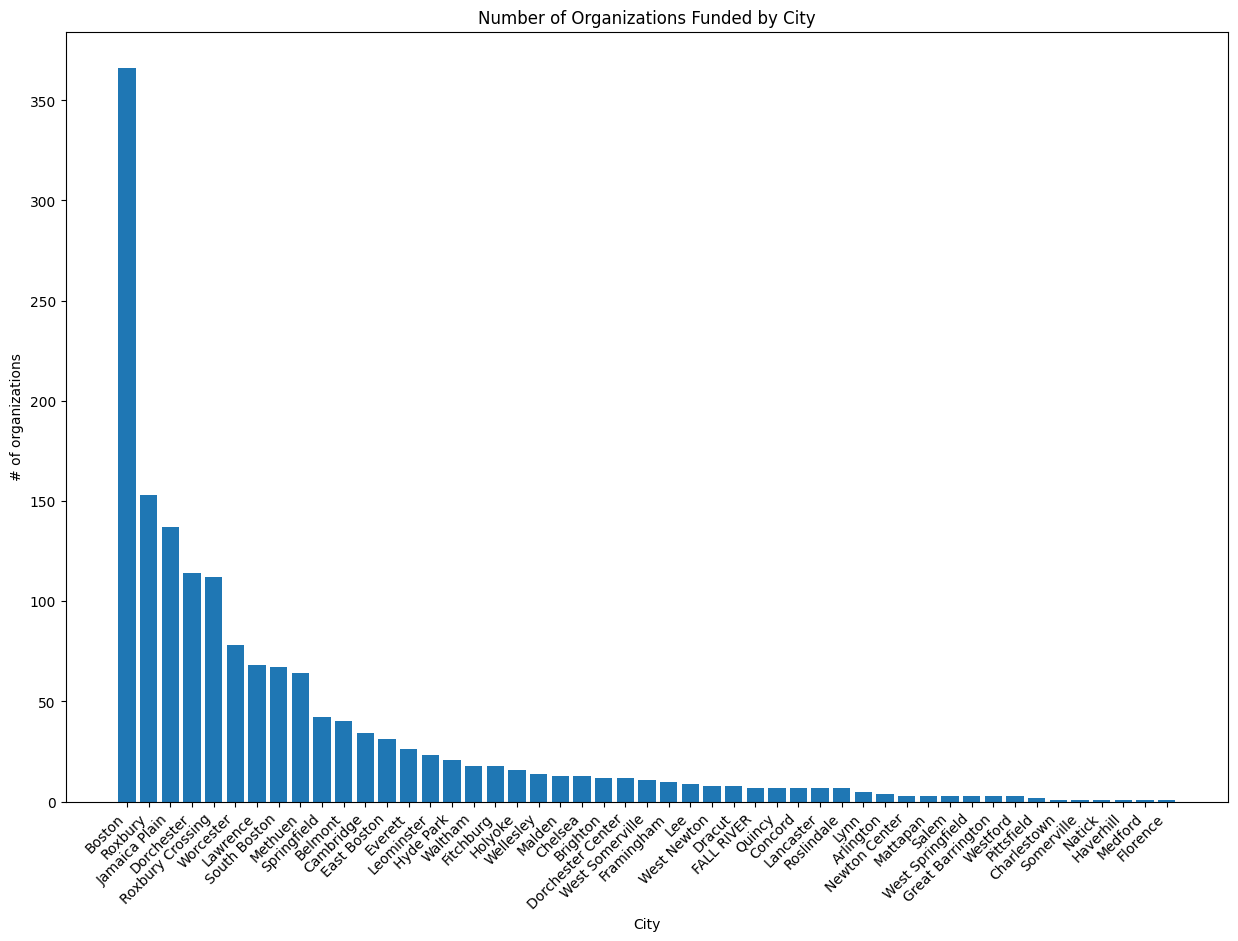

In [ ]:
unique_cities = filtered_grants_df['recip_city'].value_counts()
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.bar(unique_cities.index, unique_cities)
plt.xlabel("City")
plt.ylabel("# of organizations")
plt.title('Number of Organizations Funded by City')
plt.show()

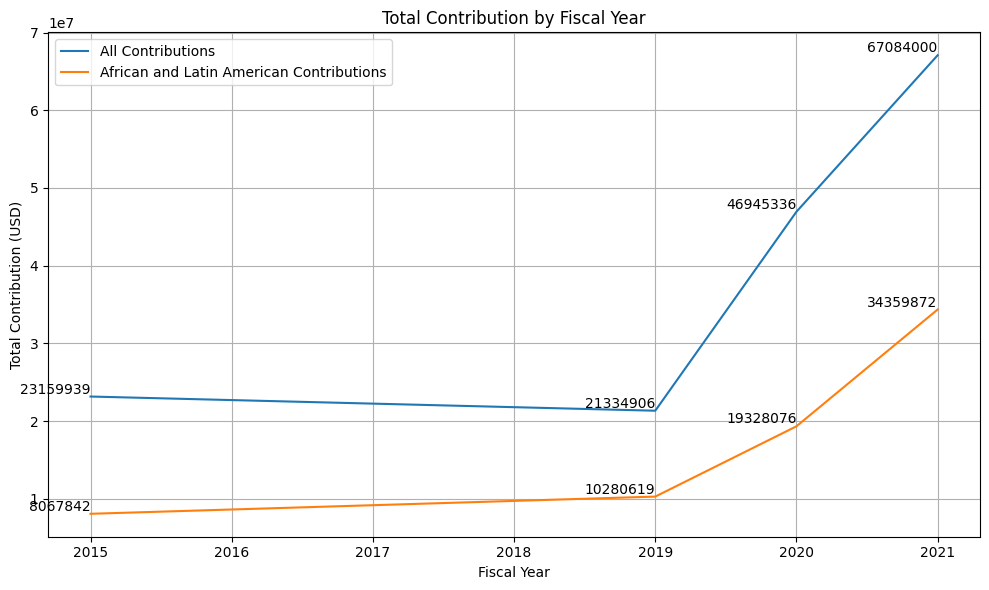

In [ ]:
# finding the comparison for amount of grants towards african/latinx vs total contributions
total_amount_by_year = df_grants.groupby('fiscal_year')['amount_usd'].sum()
yearly_contrib = filtered_grants_df.groupby('fiscal_year')['amount_usd'].sum()


# Plotting the graph of the amounts
plt.figure(figsize=(10, 6))
plt.plot(total_amount_by_year.index, total_amount_by_year.values, label='All Contributions')
plt.plot(yearly_contrib.index, yearly_contrib.values, label='African and Latin American Contributions')

for i, txt in enumerate(total_amount_by_year.values):
    plt.text(total_amount_by_year.index[i], txt, f'{txt:.0f}', ha='right', va='bottom')

for i, txt in enumerate(yearly_contrib.values):
    plt.text(yearly_contrib.index[i], txt, f'{txt:.0f}', ha='right', va='bottom')

plt.xlabel('Fiscal Year')
plt.ylabel('Total Contribution (USD)')
plt.title('Total Contribution by Fiscal Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


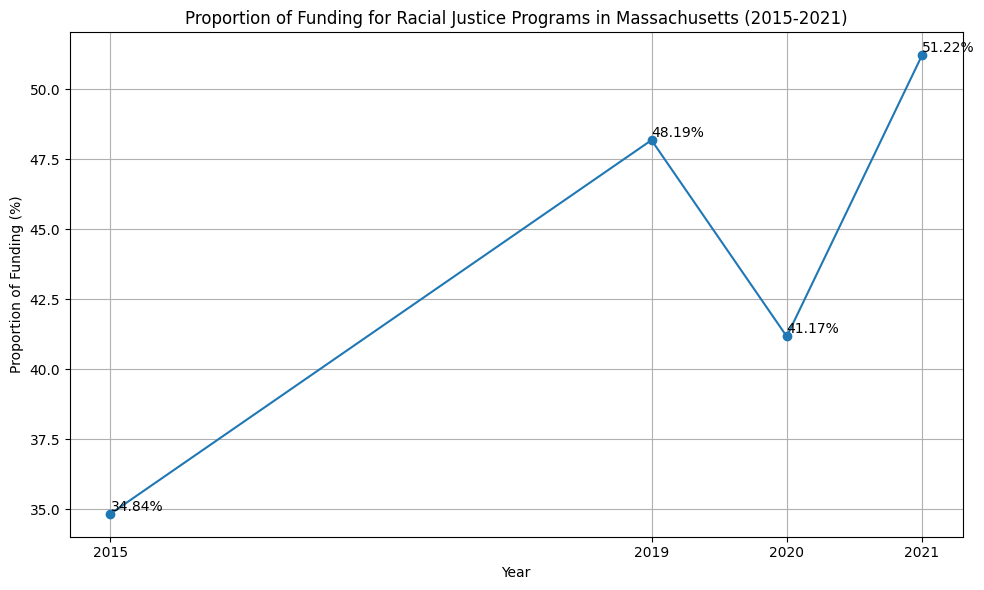

In [ ]:
# plotting the proportions of african/latinx divided by the total amount per year
proportions = (yearly_contrib / total_amount_by_year) * 100

plt.figure(figsize=(10, 6))
plt.plot(proportions.index, proportions.values, marker='o', linestyle='-')
plt.title('Proportion of Funding for Racial Justice Programs in Massachusetts (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Proportion of Funding (%)')
plt.grid(True)
plt.xticks(proportions.index)


for year, prop in zip(proportions.index, proportions.values):
    plt.text(year, prop, f'{prop:.2f}%', ha='left', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

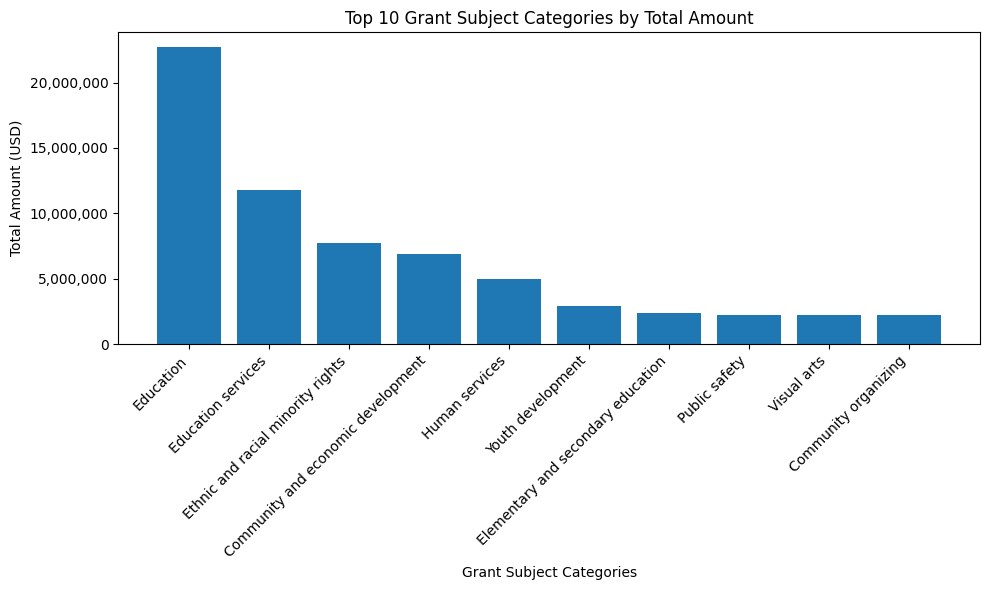

Total amount contributed by the "Education" category: $11,822,575.00


In [ ]:
# top 10 subject categories by total amount
subject_tran_values = filtered_grants_df['grant_subject_tran'].str.split('; ')
subject_tran_values = subject_tran_values.explode().str.strip().unique()

subject_amounts = {}
for subject in subject_tran_values:
    subject_amounts[subject] = filtered_grants_df[filtered_grants_df['grant_subject_tran'].str.contains(subject)].amount_usd.sum()

sorted_subject_amounts = dict(sorted(subject_amounts.items(), key=lambda x: x[1], reverse=True))
top_10_subjects = dict(list(sorted_subject_amounts.items())[:10])

plt.figure(figsize=(10, 6))
plt.bar(top_10_subjects.keys(), top_10_subjects.values())
plt.xlabel('Grant Subject Categories')
plt.ylabel('Total Amount (USD)')
plt.title('Top 10 Grant Subject Categories by Total Amount')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis ticks as whole numbers
plt.tight_layout()
plt.show()

education_df = filtered_grants_df[filtered_grants_df['grant_subject_tran'].str.contains('Education services')]

# Calculate the total amount for the 'Education' category
total_amount_education = education_df['amount_usd'].sum()

print(f'Total amount contributed by the "Education" category: ${total_amount_education:,.2f}')

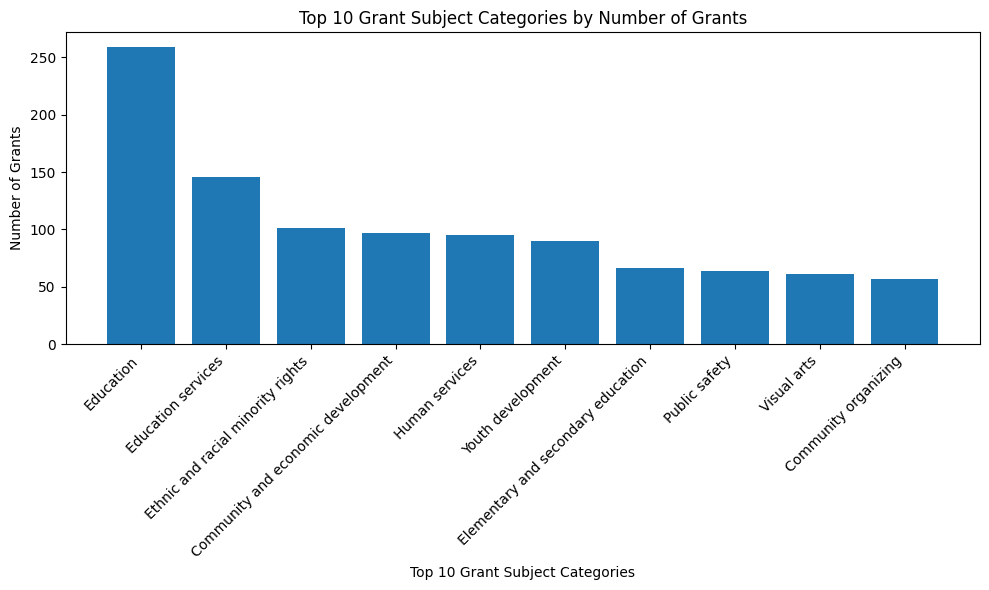

66


In [ ]:
# top 10 subject categories for count of grants
subject_counts = {}

for subject in subject_tran_values:
    subject_counts[subject] = filtered_grants_df[filtered_grants_df['grant_subject_tran'].str.contains(subject)].shape[0]

sorted_subject_counts = dict(sorted(subject_counts.items(), key=lambda x: x[1], reverse=True))
top_10_subject_counts = dict(list(sorted_subject_counts.items())[:10])

plt.figure(figsize=(10, 6))
plt.bar(top_10_subjects.keys(), top_10_subject_counts.values())
plt.xlabel('Top 10 Grant Subject Categories')
plt.ylabel('Number of Grants')
plt.title('Top 10 Grant Subject Categories by Number of Grants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(filtered_grants_df[filtered_grants_df['grant_subject_tran'].str.contains("Education services")].shape[0])

grant_subject_tran
Education services                    11822575
Education                             10574243
Ethnic and racial minority rights      7758697
Community and economic development     6890513
Human services                         4965315
Youth development                      2941965
Elementary and secondary education     2390887
Public safety                          2226548
Visual arts                            2221818
Community organizing                   2209482
Name: amount_usd, dtype: int64


<ipython-input-45-5887c771034a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_grants_df['grant_subject_tran'] = filtered_grants_df['grant_subject_tran'].str.split('; ')


<Figure size 1200x800 with 0 Axes>

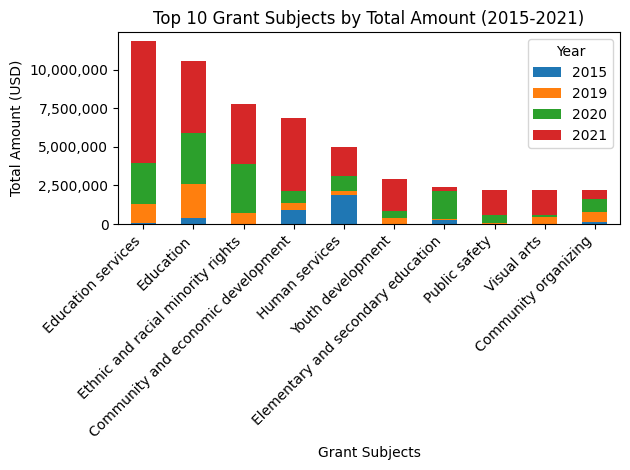

In [ ]:
filtered_grants_df['grant_subject_tran'] = filtered_grants_df['grant_subject_tran'].str.split('; ')
filtered_grants_df = filtered_grants_df.explode('grant_subject_tran')

grant_subject_amounts = filtered_grants_df.groupby('grant_subject_tran')['amount_usd'].sum()
top_10_grant_subjects = grant_subject_amounts.nlargest(10)
print(top_10_grant_subjects)

top_data = filtered_grants_df[filtered_grants_df['grant_subject_tran'].isin(top_10_grant_subjects.index)]
grouped_data = top_data.groupby(['grant_subject_tran', 'fiscal_year'])['amount_usd'].sum().reset_index()

pivot_data = grouped_data.pivot(index='grant_subject_tran', columns='fiscal_year', values='amount_usd')
pivot_data = pivot_data.loc[top_10_grant_subjects.index]

plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Grant Subjects')
plt.ylabel('Total Amount (USD)')
plt.title('Top 10 Grant Subjects by Total Amount (2015-2021)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

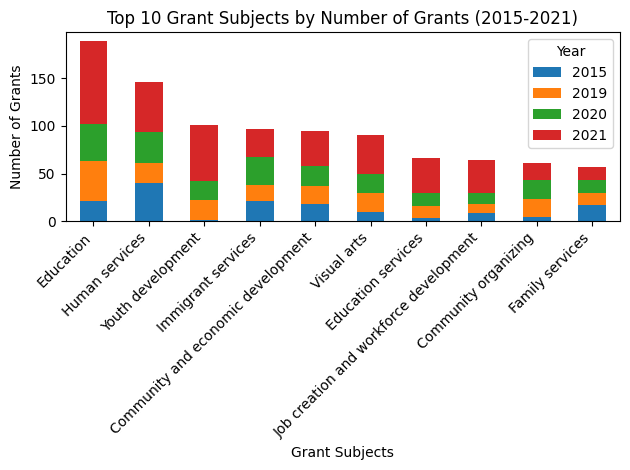

In [ ]:
filtered_grants_df['grant_subject_tran'] = filtered_grants_df['grant_subject_tran'].str.split('; ')
filtered_grants_df = filtered_grants_df.explode('grant_subject_tran')

grant_subject_counts = filtered_grants_df.groupby('grant_subject_tran').size()
top_10_grant_subjects_count = grant_subject_counts.nlargest(10)

top_data_count = filtered_grants_df[filtered_grants_df['grant_subject_tran'].isin(top_10_grant_subjects_count.index)]
grouped_data_count = top_data_count.groupby(['grant_subject_tran', 'fiscal_year']).size().reset_index(name='grant_count')

pivot_data_count = grouped_data_count.pivot(index='grant_subject_tran', columns='fiscal_year', values='grant_count')
pivot_data_count = pivot_data_count.loc[top_10_grant_subjects_count.index]

plt.figure(figsize=(12, 8))
pivot_data_count.plot(kind='bar', stacked=True)
plt.xlabel('Grant Subjects')
plt.ylabel('Number of Grants')
plt.title('Top 10 Grant Subjects by Number of Grants (2015-2021)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

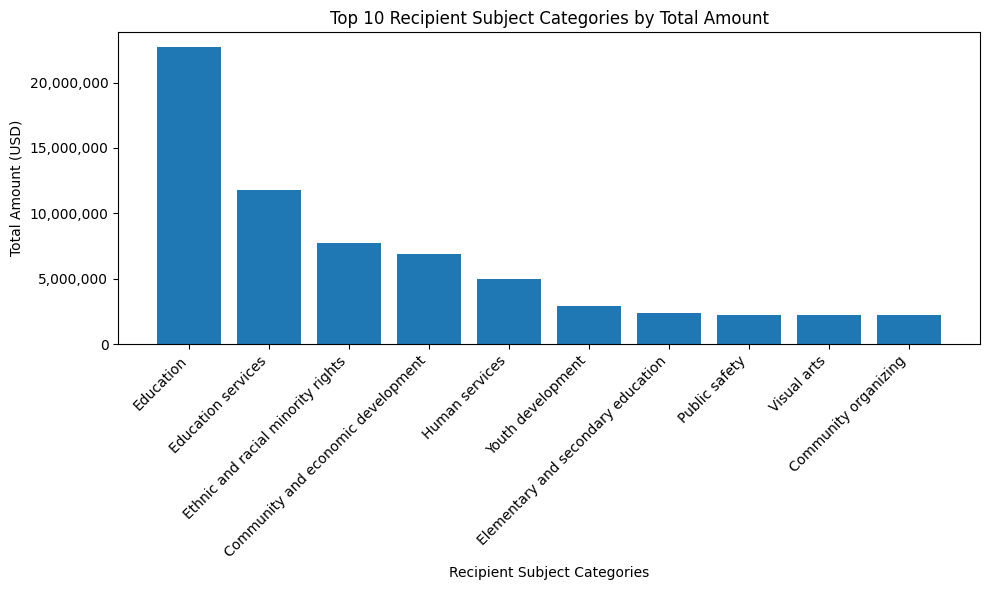

In [ ]:
# Plotting the graph for top 10 recipient subject categories
recip_tran_values = filtered_grants_df['recip_subject_tran'].str.split('; ')
recip_tran_values = recip_tran_values.explode().str.strip().unique()

recip_subject_amounts = {}

for subject in recip_tran_values:
    recip_subject_amounts[subject] = filtered_grants_df[filtered_grants_df['recip_subject_tran'].str.contains(subject)].amount_usd.sum()

sorted_recip_subject_amounts = dict(sorted(subject_amounts.items(), key=lambda x: x[1], reverse=True))
top_10_recip_subjects = dict(list(sorted_recip_subject_amounts.items())[:10])

plt.figure(figsize=(10, 6))
plt.bar(top_10_subjects.keys(), top_10_recip_subjects.values())
plt.xlabel('Recipient Subject Categories')
plt.ylabel('Total Amount (USD)')
plt.title('Top 10 Recipient Subject Categories by Total Amount')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis ticks as whole numbers
plt.tight_layout()
plt.show()

516


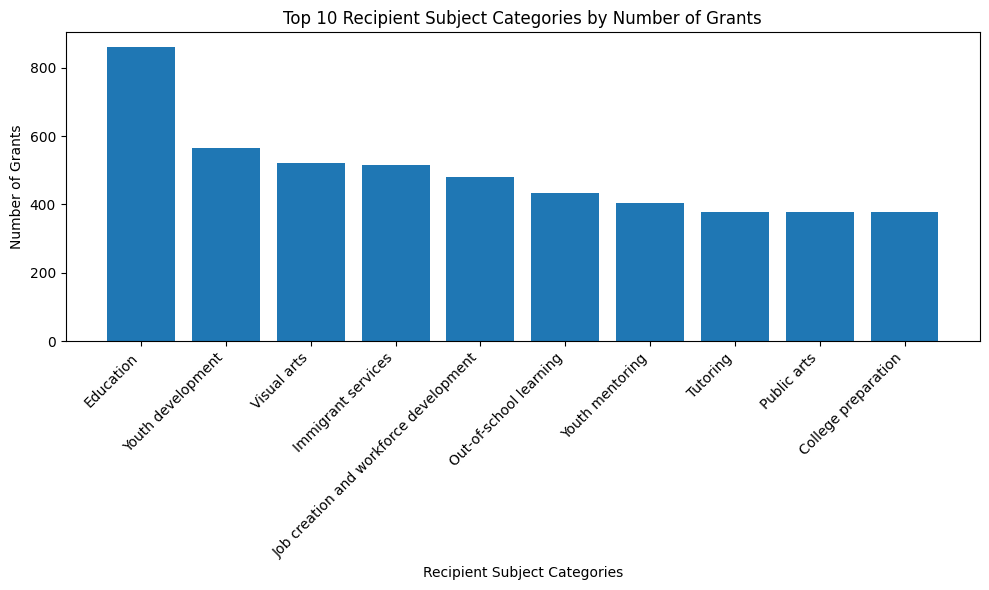

Number of rows with "Immigrant services" in recip_subject_tran: 516


In [ ]:
# Plotting the graph for the top 10 subject categories
recip_subject_counts = {}

for subject in recip_tran_values:
    recip_subject_counts[subject] = filtered_grants_df[filtered_grants_df['recip_subject_tran'].str.contains(subject, case=False, na=False)].shape[0]

print(recip_subject_counts["Immigrant services"])
sorted_recip_subject_counts = dict(sorted(recip_subject_counts.items(), key=lambda x: x[1], reverse=True))
top_10_recip_subject_counts = dict(list(sorted_recip_subject_counts.items())[:10])

plt.figure(figsize=(10, 6))
plt.bar(top_10_recip_subject_counts.keys(), top_10_recip_subject_counts.values())
plt.xlabel('Recipient Subject Categories')
plt.ylabel('Number of Grants')
plt.title('Top 10 Recipient Subject Categories by Number of Grants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

immigration_services_count = filtered_grants_df[filtered_grants_df['recip_subject_tran'].str.contains('Immigrant services', case=False, na=False)].shape[0]

print(f'Number of rows with "Immigrant services" in recip_subject_tran: {immigration_services_count}')

<Figure size 1200x800 with 0 Axes>

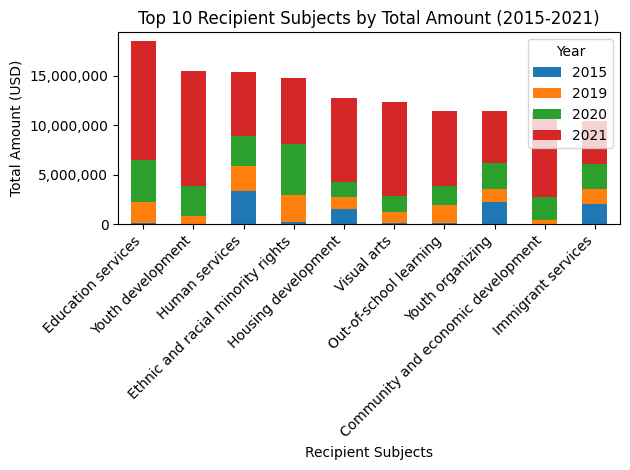

In [ ]:
filtered_grants_df['recip_subject_tran'] = filtered_grants_df['recip_subject_tran'].str.split('; ')
filtered_grants_df = filtered_grants_df.explode('recip_subject_tran')

recip_subject_amounts = filtered_grants_df.groupby('recip_subject_tran')['amount_usd'].sum()
top_10_recip_subjects = recip_subject_amounts.nlargest(10)

top_data = filtered_grants_df[filtered_grants_df['recip_subject_tran'].isin(top_10_recip_subjects.index)]
grouped_data = top_data.groupby(['recip_subject_tran', 'fiscal_year'])['amount_usd'].sum().reset_index()

pivot_data = grouped_data.pivot(index='recip_subject_tran', columns='fiscal_year', values='amount_usd')
pivot_data = pivot_data.loc[top_10_recip_subjects.index]

plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Recipient Subjects')
plt.ylabel('Total Amount (USD)')
plt.title('Top 10 Recipient Subjects by Total Amount (2015-2021)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

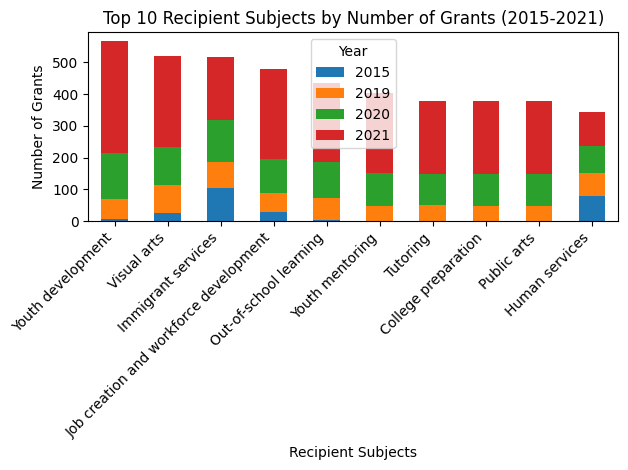

In [ ]:
filtered_grants_df['recip_subject_tran'] = filtered_grants_df['recip_subject_tran'].str.split('; ')
filtered_grants_df = filtered_grants_df.explode('recip_subject_tran')

recip_subject_counts = filtered_grants_df.groupby('recip_subject_tran').size()
top_10_recip_subjects_count = recip_subject_counts.nlargest(10)

top_data_count = filtered_grants_df[filtered_grants_df['recip_subject_tran'].isin(top_10_recip_subjects_count.index)]
grouped_data_count = top_data_count.groupby(['recip_subject_tran', 'fiscal_year']).size().reset_index(name='grant_count')

pivot_data_count = grouped_data_count.pivot(index='recip_subject_tran', columns='fiscal_year', values='grant_count')
pivot_data_count = pivot_data_count.loc[top_10_recip_subjects_count.index]

plt.figure(figsize=(12, 8))
pivot_data_count.plot(kind='bar', stacked=True)
plt.xlabel('Recipient Subjects')
plt.ylabel('Number of Grants')
plt.title('Top 10 Recipient Subjects by Number of Grants (2015-2021)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

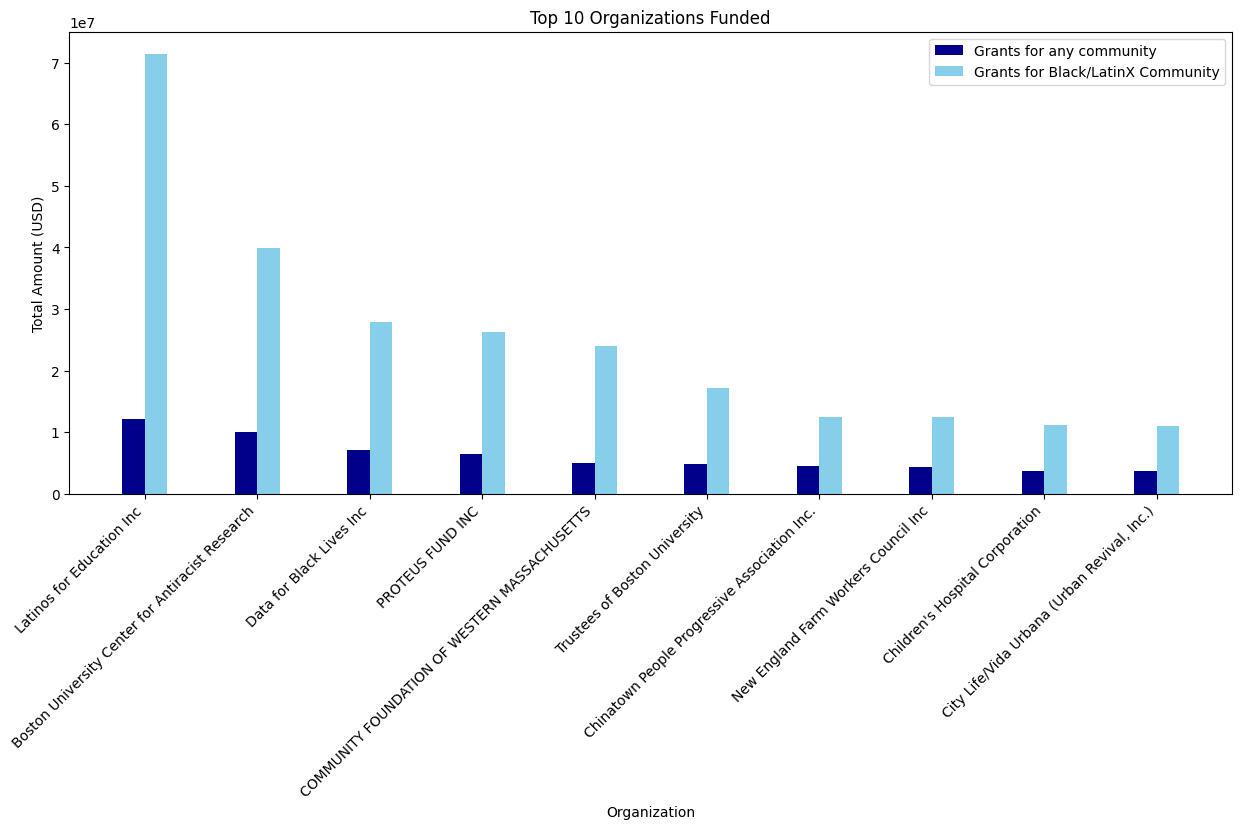

In [ ]:
# Top organizations being funded
grants_by_organization = df_grants.groupby('recip_name')['amount_usd'].sum()
filtered_grants_by_organization = filtered_grants_df.groupby('recip_name')['amount_usd'].sum()

sorted_grants_by_organization = grants_by_organization.sort_values(ascending=False)
sorted_filtered_grants_by_organization = filtered_grants_by_organization.sort_values(ascending=False)

top_10_grants_by_organization = sorted_grants_by_organization.head(10)
top_10_filtered_grants_by_organization = sorted_filtered_grants_by_organization.head(10)

fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.2

bar_positions1 = range(len(top_10_grants_by_organization))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax.bar(bar_positions1, top_10_grants_by_organization.values, bar_width, label='Grants for any community', color='darkblue')
ax.bar(bar_positions2, top_10_filtered_grants_by_organization.values, bar_width, label='Grants for Black/LatinX Community', color='skyblue')

ax.set_xlabel('Organization')
ax.set_ylabel('Total Amount (USD)')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions1])
ax.set_xticklabels(top_10_grants_by_organization.index,rotation=45,ha='right')
ax.set_title('Top 10 Organizations Funded')
ax.legend()

plt.show()